**Dataset:**

You will work with the “Global Power Plant Database” provided by the World Resources Institute, which contains detailed information about power plants worldwide. This dataset is ideal for practicing array manipulations, statistical analysis, and time series data handling.

Download the dataset here.

or you can download it directly

Here.

**Tasks:**

**Data Import and Cleaning:**

Import the dataset using Pandas.

Identify missing values and handle them appropriately.

Use NumPy to convert relevant columns to numerical types if necessary.

**Exploratory Data Analysis:**

Utilize Pandas to summarize key statistics (mean, median, standard deviation) for numerical columns.

Explore the distribution of power plants by country and fuel type.

**Statistical Analysis:**

Perform a statistical analysis of power output by fuel type using NumPy’s statistical functions.

Use hypothesis testing to determine if the mean power output differs significantly between different fuel types.

**Time Series Analysis:**

If the dataset includes time-related data (like year of establishment), use NumPy to analyze trends over time.

Explore how the mix of fuel types for power generation has evolved over the years.

**Advanced Visualization:**

Create visualizations using Matplotlib and Seaborn to illustrate your findings.

Consider plotting the geographical distribution of power plants using latitude and longitude data, if available.

**Matrix Operations in Real-World Context:**

Demonstrate matrix operations by analyzing relationships between different attributes (e.g., fuel type, capacity, and geographic location).

Discuss the relevance of eigenvectors and eigenvalues in this context.

**Integrating NumPy with Pandas and Matplotlib:**

Show how NumPy can be used to enhance data manipulation in Pandas and data visualization in Matplotlib.

Provide examples, such as using NumPy arrays for complex filtering in Pandas or for creating sophisticated plots in Matplotlib.

In [25]:
# Importing required Libraries
import pandas as pd
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

**1. Data Import and Cleaning**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving global_power_plant_database.csv to global_power_plant_database.csv


In [3]:
df = pd.read_csv('global_power_plant_database.csv')
df.head()

<ipython-input-3-643b25f2f7a1>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [21]:
# Impute 'other_fuel' columns with 'None'
df['other_fuel1'].fillna('None', inplace=True)
df['other_fuel2'].fillna('None', inplace=True)
df['other_fuel3'].fillna('None', inplace=True)

# Impute numerical columns with their median
df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median(), inplace=True)

# Impute generation_gwh columns with their median
generation_cols = [col for col in df.columns if 'generation_gwh' in col]
for col in generation_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Impute object columns with 'Unknown'
df['owner'].fillna('Uknown', inplace=True)
df['source'].fillna('Uknown', inplace=True)
df['geolocation_source'].fillna('Uknown', inplace=True)
df['wepp_id'].fillna('Uknown', inplace=True)
df['generation_data_source'].fillna('Unknown', inplace=True)

# Impute 'url' with 'No URL'
df['url'].fillna('No URL', inplace=True)

# Convert 'commissioning_year' to integer
df['commissioning_year'] = df['commissioning_year'].round().astype(int)

# verify that there are no more missing values
df.isnull().sum()

<ipython-input-21-cd91ece16275>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)
<ipython-input-21-cd91ece16275>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

,0
country,0
country_long,0
name,0
gppd_idnr,0
capacity_mw,0
latitude,0
longitude,0
primary_fuel,0
other_fuel1,0
other_fuel2,0


**2. Exploratory Data Analysis**

In [12]:
# Summary Statistics
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000,34936.000000
mean,163.355148,32.816637,-6.972803,2002.213173,2018.667134,127.988808,154.588104,199.008635,198.005249,192.985207,151.775157,125.547018,125.205717,129.424463,128.846972,132.232824,681.505825
std,489.636072,22.638603,78.405850,17.215166,1.117514,957.739058,1046.708882,1266.608895,1264.941568,1268.250339,1061.662658,911.908039,816.018694,890.157657,891.256782,899.269378,2424.229996
min,1.000000,-77.847000,-179.977700,1896.000000,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.067500,8.960000
50%,16.745000,39.727750,-2.127100,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2007.000000,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,28.040000,195.640000
max,22500.000000,71.292000,179.388700,2020.000000,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [13]:
# Power Plants by Country
plants_by_country = df['country_long'].value_counts()
plants_by_country

,count
country_long,
United States of America,9833
China,4235
United Kingdom,2751
Brazil,2360
France,2155
...,...
Guinea-Bissau,1
Saint Lucia,1
Palestine,1


In [14]:
# Power Plants by Fuel Type
plants_by_fuel = df['primary_fuel'].value_counts()
plants_by_fuel

,count
primary_fuel,
Solar,10665
Hydro,7156
Wind,5344
Gas,3998
Coal,2330
Oil,2320
Biomass,1430
Waste,1068
Nuclear,195


**3. Statistical Analysis**

In [16]:
# Mean, std by fuel type
fuel_stats = df.groupby('primary_fuel')['capacity_mw'].agg([np.mean, np.median, np.std])
fuel_stats

<ipython-input-16-44ade4ec4686>:2: FutureWarning: The provided callable <function mean at 0x7f8328236340> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  fuel_stats = df.groupby('primary_fuel')['capacity_mw'].agg([np.mean, np.median, np.std])
<ipython-input-16-44ade4ec4686>:2: FutureWarning: The provided callable <function median at 0x7f8324f0f600> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  fuel_stats = df.groupby('primary_fuel')['capacity_mw'].agg([np.mean, np.median, np.std])
<ipython-input-16-44ade4ec4686>:2: FutureWarning: The provided callable <function std at 0x7f8328236480> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the str

,mean,median,std
primary_fuel,,,
Biomass,23.972938,9.45000,39.461805
Coal,843.579828,600.00000,888.187187
Cogeneration,98.731707,31.90000,283.428252
Gas,373.449375,147.50000,560.934146
Geothermal,67.130952,30.00000,114.640890
Hydro,147.171551,20.00000,549.809328
Nuclear,2091.855179,1888.00000,1303.509273
Oil,112.878754,9.00000,392.009039
Other,84.020000,40.00000,145.891392


In [19]:
# Hypothesis Testing: ANOVA
fuel_groups = [group['capacity_mw'].values for name, group in df.groupby('primary_fuel')]
anova_result = f_oneway(*fuel_groups)
anova_result

F_onewayResult(statistic=np.float64(967.460035308931), pvalue=np.float64(0.0))

Since the p-value is 0 (p < 0.05), we reject the null hypothesis (The mean power output is the same for all fuel types)

**4. Time Series Analysis**

In [22]:
# Average Capacity per Year
avg_capacity_per_year = df.groupby('commissioning_year')['capacity_mw'].mean()
avg_capacity_per_year

,capacity_mw
commissioning_year,
1896,2.000000
1899,3.200000
1900,14.823333
1901,3.700000
1902,5.875000
...,...
2016,151.679094
2017,76.580319
2018,63.675201


In [24]:
# Evaluation of Fuel Types
fuel_year_trend = df.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)
fuel_year_trend

primary_fuel,Biomass,Coal,Cogeneration,Gas,Geothermal,Hydro,Nuclear,Oil,Other,Petcoke,Solar,Storage,Waste,Wave and Tidal,Wind
commissioning_year,,,,,,,,,,,,,,,
1896,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1899,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1900,0,0,0,1,0,3,0,2,0,0,0,0,0,0,0
1901,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
1902,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,8,84,1,48,0,45,0,39,0,0,466,12,16,0,167
2017,3,46,0,49,1,22,0,4,1,0,523,19,7,0,108
2018,3,14,0,51,3,4,0,8,1,0,481,10,5,0,41


**5. Advanced Visualization**

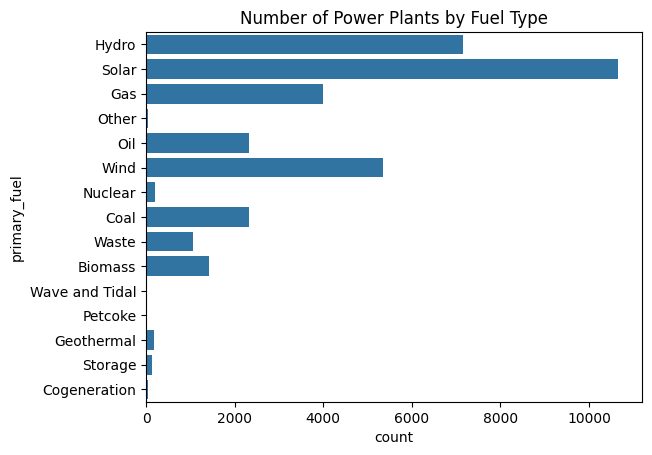

In [26]:
# Bar Chart: Power Plants by Fuel Type
sns.countplot(y='primary_fuel', data =df)
plt.title('Number of Power Plants by Fuel Type')
plt.show()

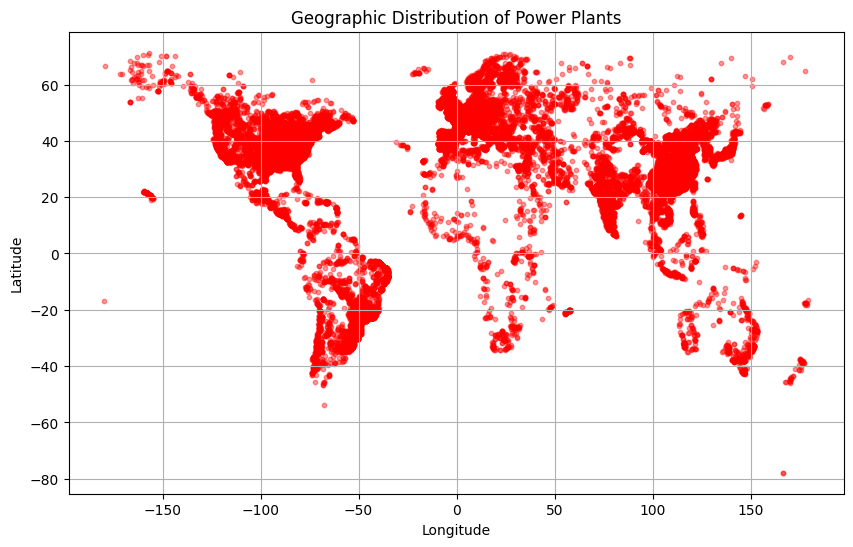

In [29]:
# Geographical Distribution
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c='red', alpha=0.4, s=10)
plt.title('Geographic Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

**6. Matrix Operations in Real-World Context**

In [31]:
matrix = df[['capacity_mw', 'latitude', 'longitude']].values

# Covariance Matrix
cov_matrix = np.cov(matrix, rowvar=False)

# Eigen Values & eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

eig_vals, eig_vecs

(array([239888.34493566,   6005.22827679,    509.89320204]),
 array([[ 9.99690263e-01, -2.48871486e-02,  9.13937503e-05],
        [-6.24482185e-04, -2.14133001e-02,  9.99770514e-01],
        [ 2.48794803e-02,  9.99460905e-01,  2.14222092e-02]]))

The first principal component corresponds almost entirely to capacity_mw. This shows that the biggest variance in the data is the differences in plant capacity regardless of location.

The second and third components correspond roughly to spatial variations:

The second mostly captures variation along longitude.

The third captures variation along latitude.

Since capacity variance dominates, capacity is the strongest distinguishing feature in the dataset.

The spatial coordinates (latitude, longitude) vary less in magnitude compared to capacity, which is reflected in their much smaller eigenvalues.

**7. Integrating NumPy with Pandas and Matplotlib**

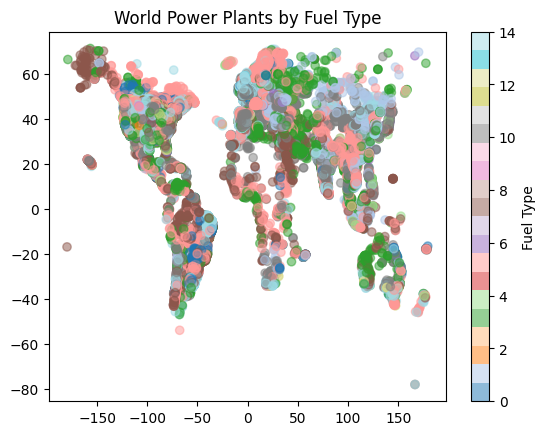

In [32]:
high_capacity = df[np.array(df['capacity_mw'] > 1000)]

# Color-coded scatter plot based on fuel type
fuel_colors = df['primary_fuel'].astype('category').cat.codes
plt.scatter(df['longitude'], df['latitude'], c=fuel_colors, cmap='tab20', alpha=0.5)
plt.colorbar(label='Fuel Type')
plt.title("World Power Plants by Fuel Type")
plt.show()